In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Importing the CSV file from the desktop
df=pd.read_csv(r"C:\Users\ramez-PC\Downloads\1- datasets\dataset_olympics.csv")
regions=pd.read_csv(r"C:\Users\ramez-PC\Downloads\1- datasets\noc_region.csv")
df.sample(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
25221,13198,Yannick Bonheur,M,23.0,183.0,82.0,France,FRA,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Pairs,NaN
13947,7550,"William Augustus ""Willie"" Banks, III",M,28.0,190.0,77.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Triple Jump,NaN


In [3]:
# ID: Unique identifier for each athlete
# Name: Name of the athlete
# Sex: Sex of the athlete (M for male, F for female)
# Age: Age of the athlete
# Height: Height of the athlete in cm
# Weight: Weight of the athlete in kg
# Team: The team the athlete is representing
# NOC: National Olympic Committee 3-letter code
# Games: The specific Games the athlete participated in
# Year: The year of the Games
# Season: The season of the Games (Summer or Winter)
# City: The city where the Games were held
# Sport: The sport in which the athlete participated
# Event: The specific event within the sport
# Medal: The medal won by the athlete (if any)

In [4]:
# Renaming the columns of regions dataset to look like the original dataset
# and to make merging easier

regions.rename(columns = {'noc_region':'NOC', 'reg':'Country'}, inplace = True)
regions.head()

,NOC,Country,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# merging the datasets

merged=df.merge(regions, on="NOC", how="left")
merged.sample(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,notes
33841,17439,Vincenza Cal,F,24.0,171.0,62.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 200 metres,NaN,Italy,NaN
66714,34123,George Hardy Farquhar,M,26.0,NaN,NaN,Great Britain,GBR,1956 Summer,1956,Summer,Melbourne,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN,UK,NaN


In [6]:
merged.shape

(70000, 17)

In [7]:
merged.dtypes

ID           int64
Name        object
Sex         object
Age        float64
Height     float64
Weight     float64
Team        object
NOC         object
Games       object
Year         int64
Season      object
City        object
Sport       object
Event       object
Medal       object
Country     object
notes       object
dtype: object

In [8]:
# Cleaning Dataset
# Inspecting for duplicates to remove if existed

print('There are', merged.duplicated().sum(), "Duplicate row")

There are 383 Duplicate row


In [9]:
# Ispecting how the duplicates look before removing them

merged.loc[merged.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,notes
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67774,34642,Clara Beatrice Fenton,F,45.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,USA,NaN
69050,35215,Pedro Figari Solari,M,71.0,NaN,NaN,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,NaN,Uruguay,NaN
69051,35215,Pedro Figari Solari,M,71.0,NaN,NaN,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,NaN,Uruguay,NaN
69052,35215,Pedro Figari Solari,M,71.0,NaN,NaN,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,NaN,Uruguay,NaN


In [10]:
# Removing duplicates

merged.drop_duplicates(inplace=True)

In [11]:
merged.duplicated().sum()

0

In [12]:
# Inspecting Null values

merged.isnull().sum()

ID             0
Name           0
Sex            0
Age         2671
Height     15876
Weight     16718
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal      59931
Country       63
notes      68374
dtype: int64

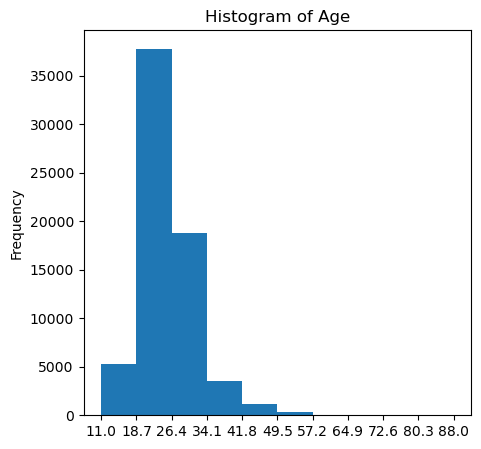

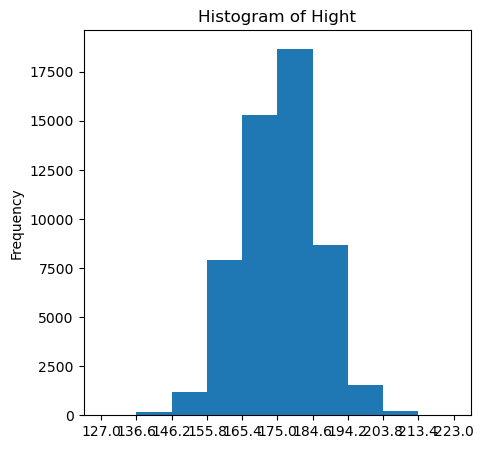

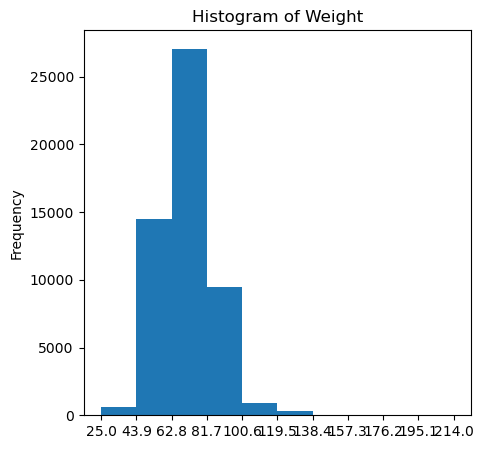

In [13]:
# Creat a histogram to check skweness of data
# Replace null values by its mean if data is not skewed
# Replace null values by its median if data is skewed

count, bin_edges = np.histogram(merged['Age'].dropna())
merged['Age'].plot(kind='hist', figsize=(5, 5), xticks=bin_edges)
plt.title('Histogram of Age') # title
plt.show()

count, bin_edges = np.histogram(merged['Height'].dropna())
merged['Height'].plot(kind='hist', figsize=(5, 5), xticks=bin_edges)
plt.title('Histogram of Hight') # title
plt.show()

count, bin_edges = np.histogram(merged['Weight'].dropna())
merged['Weight'].plot(kind='hist', figsize=(5, 5), xticks=bin_edges)
plt.title('Histogram of Weight') # title
plt.show()

In [14]:
# Cleaning Dataset
# Filling the empty cells with the mean

merged['Medal'].fillna(0, inplace=True)
merged['Age'].fillna(merged['Age'].mean , inplace=True)
merged['Height'].fillna(merged['Height'].mean , inplace=True)
merged['Weight'].fillna(merged['Weight'].mean , inplace=True)
merged.dropna(subset=["Country"], inplace=True) 

In [15]:
merged.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
Country        0
notes      68319
dtype: int64

In [16]:
merged.shape

(69554, 17)

In [17]:
# Dividing the main dataset
# 1- Summer data

df_s = merged[merged["Season"] == "Summer"]
df_s.shape

(58021, 17)

In [18]:
# 2- Winter data

df_w = merged[merged["Season"] == "Winter"]
df_w.shape

(11533, 17)

In [19]:
# Now let's see the the gross of sport number included in each edition.
# I will make two supsets of the edition and Number of sports then combining them. 
# Plotting result as a column plot to see the gross over time.

sport_gross_s = df_s.drop_duplicates(["Year", "Sport"])["Year"].value_counts().reset_index().sort_values('index')
sport_gross_s.rename(columns = {"index": "Edition", "Year": "Sports Count S"}, inplace = True)
sport_gross_w = df_w.drop_duplicates(["Year", "Sport"])["Year"].value_counts().reset_index().sort_values('index')
sport_gross_w.rename(columns = {"index": "Edition", "Year": "Sports Count W"}, inplace = True)
sport_gross_overall=sport_gross_s.merge(sport_gross_w, on="Edition", how="left")
sport_gross_overall.set_index('Edition', inplace=True)
sport_gross_overall['Sports Count W'] = sport_gross_overall['Sports Count W'].astype("Int64")
sport_gross_overall.sample(3)

,Sports Count S,Sports Count W
Edition,,
1936,23,8
1908,24,<NA>
1980,23,10


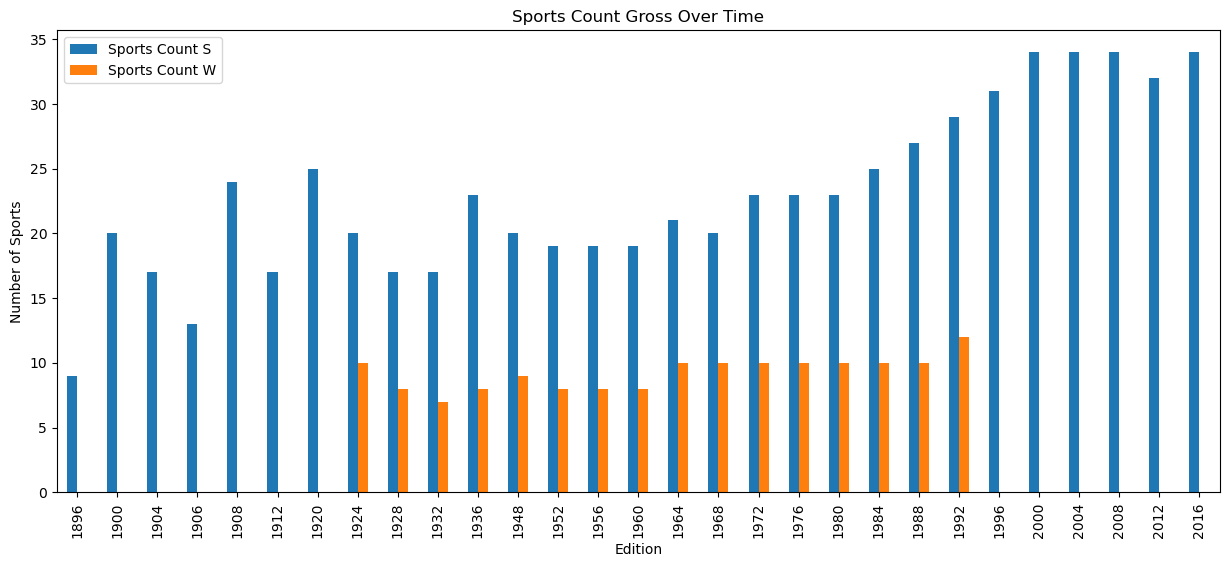

In [20]:
                                # Chart No: 2
                        # Column Chart for sports count gross over time

sport_gross_overall.plot(kind='bar', figsize=(15,6))
plt.title('Sports Count Gross Over Time')
plt.xlabel('Edition')
plt.ylabel('Number of Sports')
plt.show()

In [21]:
# Increasing the number of sports may lead to increasing number of nations competing in editions.
# Let's see how number of nations changed over time.

nations_gross_s = df_s.drop_duplicates(["Year", "Country"])["Year"].value_counts().reset_index().sort_values('index')
nations_gross_s.rename(columns = {"index": "Edition", "Year": "Country Count S"}, inplace = True)
nations_gross_w = df_w.drop_duplicates(["Year", "Country"])["Year"].value_counts().reset_index().sort_values('index')
nations_gross_w.rename(columns = {"index": "Edition", "Year": "Country Count W"}, inplace = True)
nations_gross_overall=nations_gross_s.merge(nations_gross_w, on="Edition", how="left")
nations_gross_overall.set_index('Edition', inplace=True)
nations_gross_overall['Country Count W'] = nations_gross_overall['Country Count W'].astype("Int64")
nations_gross_overall.sample(3)

,Country Count S,Country Count W
Edition,,
1908,18,<NA>
2016,177,<NA>
1964,83,33


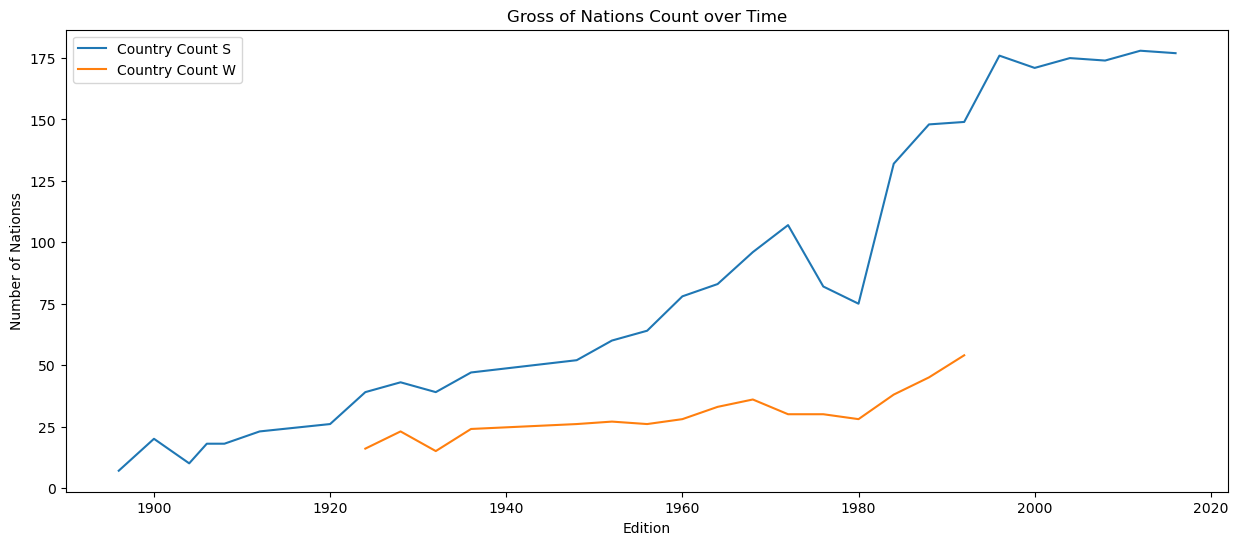

In [22]:
                                # Chart No: 3
                        # Line Chart for gross of nations over time

        
nations_gross_overall.plot(kind='line', figsize=(15,6))
plt.title('Gross of Nations Count over Time')
plt.xlabel('Edition')
plt.ylabel('Number of Nationss')
plt.show()


In [23]:
# As sports count increases, athletes number will increase too.
# Let's see how athletes count gdeveloped over time.
# I will make two supsets of the edition and athletes count then combining them.

athlete_s=df_s.drop_duplicates(["Year", "Name"])["Year"].value_counts().reset_index().sort_values('index')
athlete_s.rename(columns = {"index": "Edition", "Year": "Athlete Count S"}, inplace = True)
athlete_w=df_w.drop_duplicates(["Year", "Name"])["Year"].value_counts().reset_index().sort_values('index')
athlete_w.rename(columns = {"index": "Edition", "Year": "Athlete Count W"}, inplace = True)
athlete_gross_overall=athlete_s.merge(athlete_w, on="Edition", how="left")
athlete_gross_overall.set_index('Edition', inplace=True)
athlete_gross_overall['Athlete Count W'] = athlete_gross_overall['Athlete Count W'].astype("Int64")
athlete_gross_overall.sample(3)

,Athlete Count S,Athlete Count W
Edition,,
1956,838,224
1964,1294,257
2012,2765,<NA>


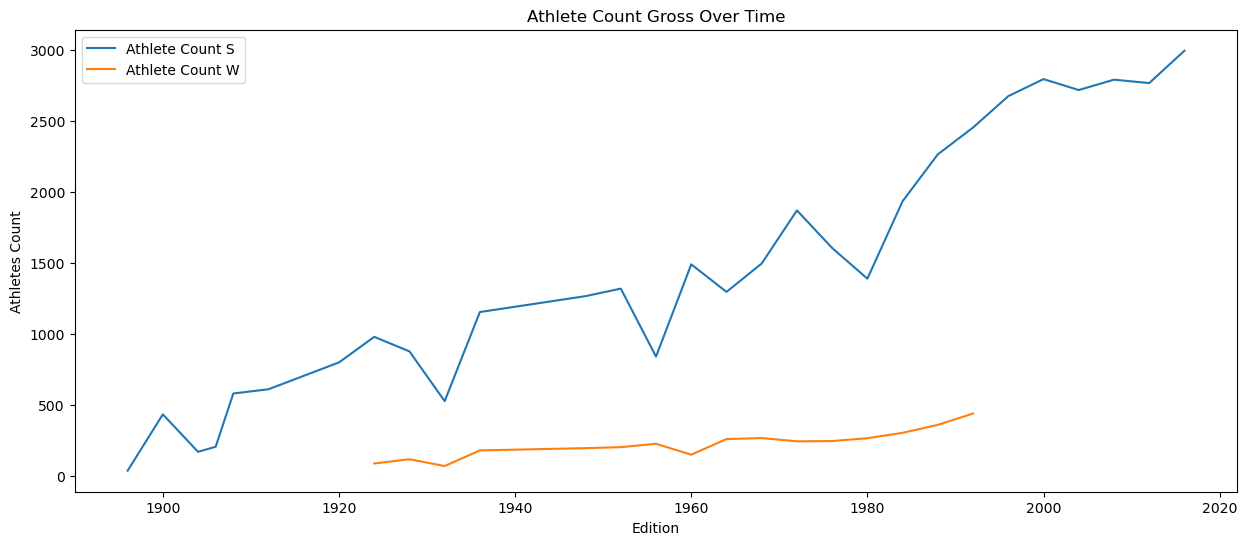

In [24]:
                                # Chart No: 4
                        # Line Chart for athlete count gross over time

        
athlete_gross_overall.plot(kind='line', figsize=(15,6))
plt.title('Athlete Count Gross Over Time')
plt.xlabel('Edition')
plt.ylabel('Athletes Count')
plt.show()

In [25]:
# let's see the total % participation by gender

gender=merged.drop_duplicates(["Sex", "Name"])["Sex"].value_counts().reset_index().sort_values('index')
gender.rename(columns = {"index": "Gender", "Sex": "Gender Count"}, inplace = True)
gender.set_index('Gender', inplace=True)
gender

,Gender Count
Gender,
F,8282
M,27239


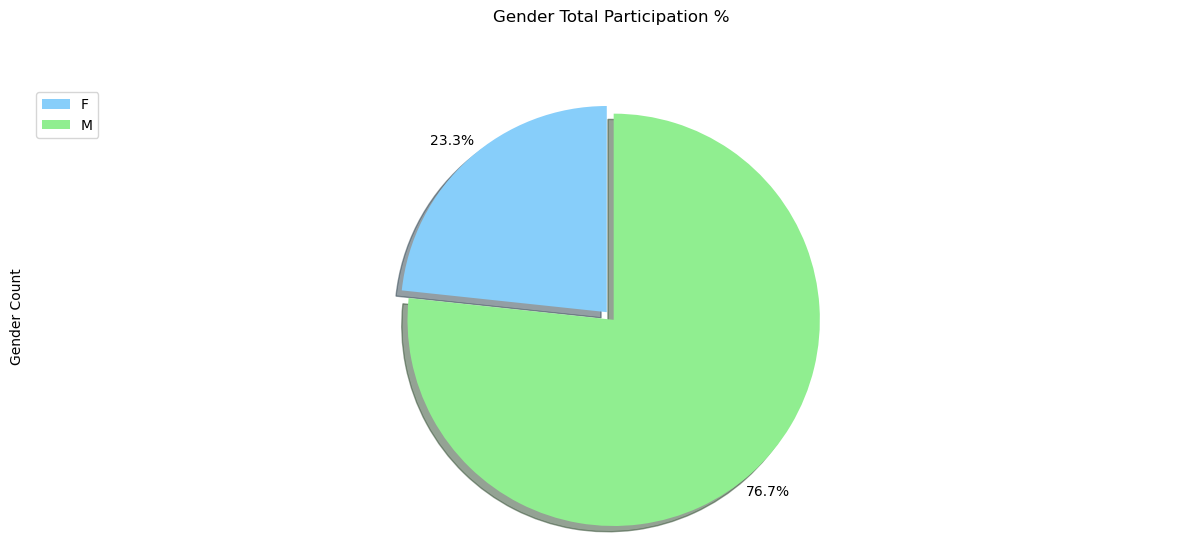

In [34]:
                                # Chart No: 5
                        # Pie chart for  total gender participation % 


colors_list=['lightskyblue','lightgreen']
explode_list=[0.05,0.0]
gender['Gender Count'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
plt.title('Gender Total Participation %', y=1.12)
plt.axis('equal')
plt.legend(labels=gender.index, loc='upper left')
plt.show()

In [27]:
# Let's dive deeper and see if there is a change in gender participation over time
# I will do 4 lines plot for male S, male W, female S and female W

men_s = df_s[df_s["Sex"] == "M"]
men_w = df_w[df_w["Sex"] == "M"]
women_s = df_s[df_s["Sex"] == "F"]
women_w = df_w[df_w["Sex"] == "F"]

male_athlete_s=men_s.drop_duplicates(["Year", "Name"])["Year"].value_counts().reset_index().sort_values('index')
male_athlete_s.rename(columns = {"index": "Edition", "Year": "Male Athlete Count S"}, inplace = True)
male_athlete_w=men_w.drop_duplicates(["Year", "Name"])["Year"].value_counts().reset_index().sort_values('index')
male_athlete_w.rename(columns = {"index": "Edition", "Year": "Male Athlete Count W"}, inplace = True)
male_athlete_w['Male Athlete Count W'] = male_athlete_w['Male Athlete Count W'].astype("Int64")

female_athlete_s=women_s.drop_duplicates(["Year", "Name"])["Year"].value_counts().reset_index().sort_values('index')
female_athlete_s.rename(columns = {"index": "Edition", "Year": "Female Athlete Count S"}, inplace = True)
female_athlete_s['Female Athlete Count S'] = female_athlete_s['Female Athlete Count S'].astype("Int64")
female_athlete_w=women_w.drop_duplicates(["Year", "Name"])["Year"].value_counts().reset_index().sort_values('index')
female_athlete_w.rename(columns = {"index": "Edition", "Year": "Female Athlete Count W"}, inplace = True)
female_athlete_w['Female Athlete Count W'] = female_athlete_w['Female Athlete Count W'].astype("Int64")

athlete_gender_gross=male_athlete_s.merge(male_athlete_w, on="Edition", how="left").merge(female_athlete_s, on='Edition', how='left').merge(female_athlete_w, on='Edition', how='left')
athlete_gender_gross.set_index('Edition', inplace=True)
athlete_gender_gross.sample(3)

,Male Athlete Count S,Male Athlete Count W,Female Athlete Count S,Female Athlete Count W
Edition,,,,
1920,772,<NA>,25,<NA>
2012,1568,<NA>,1197,<NA>
1932,475,58,49,9


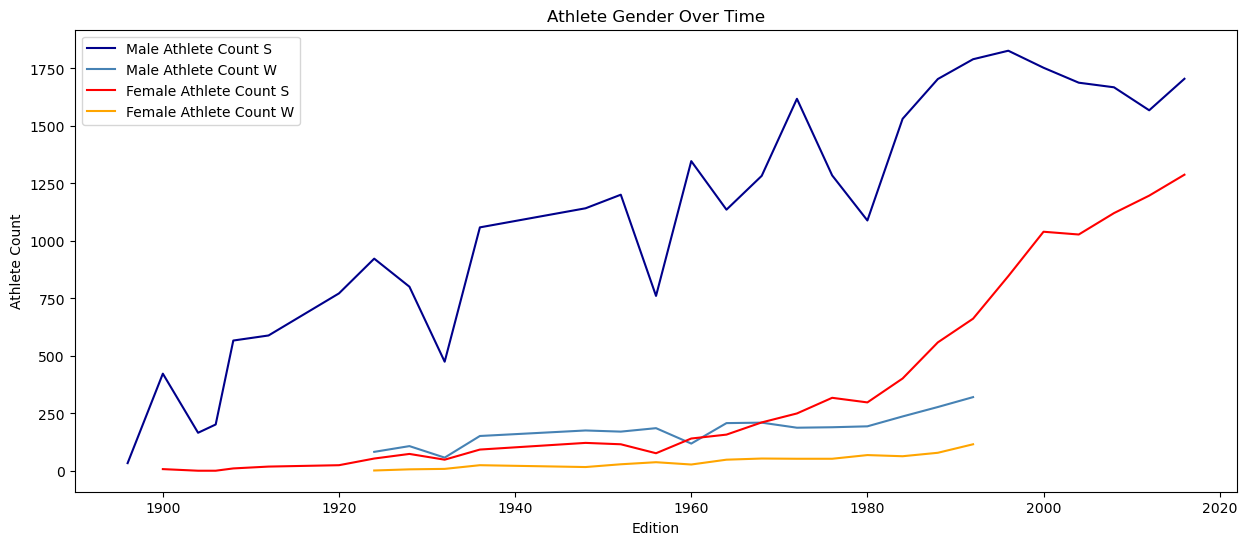

In [28]:
                                # Chart No: 6
                        # Line Chart for athlete gender gross over time


colors_list=['darkblue', 'steelblue', 'red', 'orange']
athlete_gender_gross.plot(kind='line', figsize=(15,6), color=colors_list)
plt.title('Athlete Gender Over Time')
plt.xlabel('Edition')
plt.ylabel('Athlete Count')
plt.show()

In [29]:
medal = pd.concat([merged, pd.get_dummies(merged["Medal"])], axis=1)
medals=medal.groupby("Country").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold").reset_index().tail(10)
medals.set_index('Country', inplace=True)
medals

C:\Users\ramez-PC\AppData\Local\Temp\ipykernel_41892\4225544100.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medals=medal.groupby("Country").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold").reset_index().tail(10)


,Gold,Silver,Bronze
Country,,,
Hungary,94,67,80
Norway,104,94,68
Australia,105,126,152
Canada,119,114,127
France,184,216,257
UK,210,207,186
Italy,217,193,194
Germany,261,246,249
Russia,315,232,247


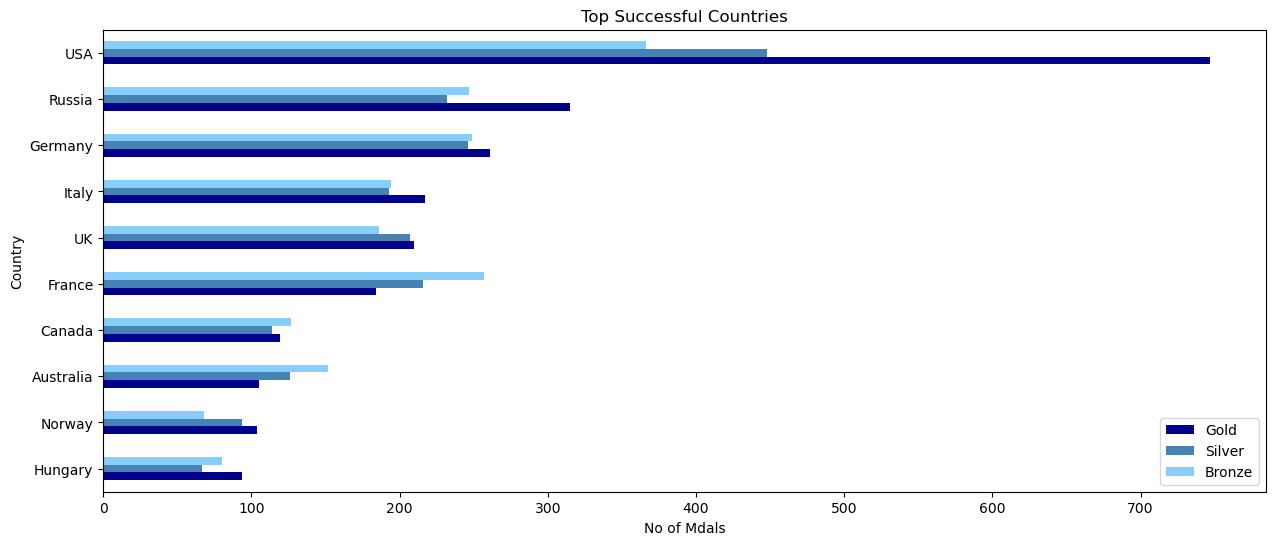

In [30]:
                                # Chart No: 7
                 # Bar Chart for top successful countries and distribution of medals won


colors_list=['darkblue','steelblue','lightskyblue']

medals.plot(kind='barh', figsize=(15, 6), color=colors_list)
plt.title('Top Successful Countries')
plt.xlabel('No of Mdals')
plt.show()

In [31]:
best_athletes=medal.groupby("Name").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index().head(15)
best_athletes.set_index('Name', inplace=True)
best_athletes

C:\Users\ramez-PC\AppData\Local\Temp\ipykernel_41892\1774001888.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_athletes=medal.groupby("Name").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending=False).reset_index().head(15)


,Gold,Silver,Bronze
Name,,,
"Raymond Clarence ""Ray"" Ewry",10,0,0
"Matthew Nicholas ""Matt"" Biondi",8,2,1
Usain St. Leo Bolt,8,0,0
Ole Einar Bjrndalen,8,4,1
Birgit Fischer-Schmidt,8,4,0
Viktor Ivanovych Chukarin,7,3,1
Nikolay Yefimovich Andrianov,7,5,3
Vra slavsk (-Odloilov),7,4,0
Allyson Michelle Felix,6,3,0


In [32]:
end=sport_gross_overall.merge(nations_gross_overall,on="Edition",how="left").merge(athlete_gross_overall,on='Edition',how='left').merge(athlete_gender_gross,on='Edition',how='left')
end

,Sports Count S,Sports Count W,Country Count S,Country Count W,Athlete Count S,Athlete Count W,Male Athlete Count S,Male Athlete Count W,Female Athlete Count S,Female Athlete Count W
Edition,,,,,,,,,,
1896,9,<NA>,7,<NA>,34,<NA>,34,<NA>,<NA>,<NA>
1900,20,<NA>,20,<NA>,431,<NA>,423,<NA>,8,<NA>
1904,17,<NA>,10,<NA>,167,<NA>,166,<NA>,1,<NA>
1906,13,<NA>,18,<NA>,203,<NA>,202,<NA>,1,<NA>
1908,24,<NA>,18,<NA>,578,<NA>,567,<NA>,11,<NA>
1912,17,<NA>,23,<NA>,608,<NA>,589,<NA>,19,<NA>
1920,25,<NA>,26,<NA>,797,<NA>,772,<NA>,25,<NA>
1924,20,10,39,16,977,85,923,83,54,2
1928,17,8,43,23,875,115,801,108,74,7


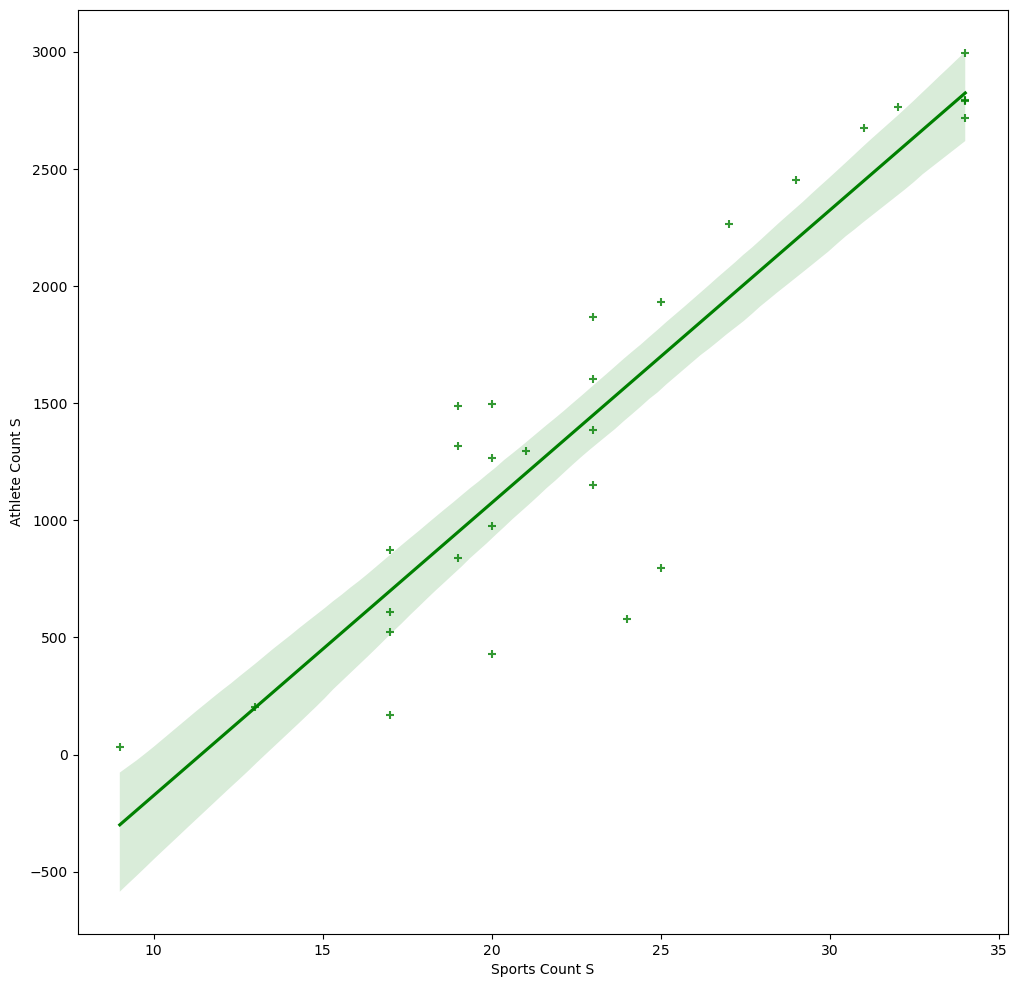

In [33]:
                                # Chart No: 8
                        # Regression plot for sport & athlete count relation


plt.figure(figsize=(12,12))
sns.regplot(x='Sports Count S', y='Athlete Count S', data=end, color='green', marker='+')
plt.show()

In [38]:
end.to_csv('OlympicMetricsDS.csv')

## HISTORICAL OLYMPICS DATA FINDINGS

* By: Ramez Abdelsalam.
* Data source "https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data/code".
* Data wrangling, analysis and visualization by Python libraries.
* sample size is 70000 row for Olympics from 1896 to 2016.

* Number of sports and events developed throughout history (chart 2).
* Stable count for winter sports as the sports involving ice are not diverse.
* Winter games do not share same popularity as summer games as well.
* Number os summer sports increased from 9 to reach 34.

* the increase in sports count has a positive impact on Country count and more on athletes count.
* there were 4 olympics where athlete and country participation dropped significantly (chart 3,4).
* 1904 due to tensions caused by the Russo–Japanese War and difficulties in traveling to St. Louis.
* 1932 due to the great depression of 1929.
* 1956 due to boycott started by Egypt, Iraq, Campodia and Lebanon in response to the Seuz canal crisis.
* 1980 as the US started boycott protesting against the Soviet Union invading Afghanistan.

* Gender participation has male domination by 76.7% over 23.3% for female athletes (chart 5).
* Male and female participation in Winter olympics is close and stable over time (chart 6).
* Male and female participation in summer olympics increased over time and the gap is decreasing (chart6).
* For future, itroducing new sports and events for both male and female shall decrease the gap.
* Female athlete participation is increasing significantly starting from 1984 olympics till now (chart 6).

* Top 10 most successful countries with distribution of the medals won (chart 7).
* A list of top 10 most successful athletes and the corresponding medals.
* A regression plot showing the increase of total athlete gross corresponding to increase of sport count (chart 8).